<a href="https://colab.research.google.com/github/Narendraiitg/Simple-neural-network-on-MNIST-dataset/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple neural network on MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,y_train), (X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
print(len(X_train),len(X_test)) # Total numbers of images in the training & testing samples


60000 10000


In [4]:
X_train.shape # there are 60000 images of 28x28 

(60000, 28, 28)

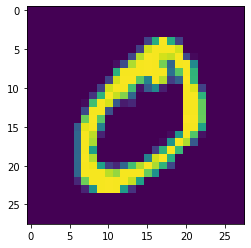

In [5]:
# Checking the images in the training samples
plt.imshow(X_train[1])

In [6]:
# Checking the respective y lables
y_train[1]

0

In [7]:
# Checking first 5 samples in y train
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [9]:
# We have the 60000 input training images of dimension 28x28 so we need to flattened the image and convert it to the one dim array of 784
X_train_flattened= X_train.reshape(len(X_train),28*28)

# We have the 10000 input test images of dimension 28x28 so we need to flattened the image and convert it to the one dim array of 784
X_test_flattened= X_test.reshape(len(X_test),28*28)

In [10]:
print(X_train_flattened.shape,X_test_flattened.shape)

(60000, 784) (10000, 784)


In [11]:
# Scaling the vaules in the array between 0 to 1 by dividing each element by 255
X_train_flattened= X_train_flattened/255

X_test_flattened= X_test_flattened/255

In [12]:
# Making the neural network with 784 input neurons and 10 output neurons with sigmoid activation function 

model= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam', # using adam optimezer to reach to the global optima in efficient way while backpropogation is going on 
    loss= 'sparse_categorical_crossentropy', # since the output class are categorical between integers 0 to 9  so we used  sparse(output variable is an integer) cataegorical crossentropy as loss function
    metrics= ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5) # 5 epochs means numbers of iteration the neural network is going to run the train 

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4711 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3041 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2838 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9264


In [13]:
# Evaluating the accuracy on test data
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.9244


[0.26698970794677734, 0.9243999719619751]

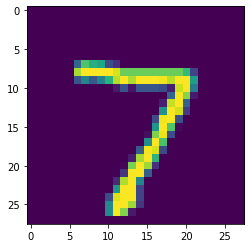

In [14]:
# Actual sample at 0th index in test samples
plt.imshow(X_test[0])

In [15]:
# prediction on test samples 
y_pred=model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [16]:
# Printing the predicted sample at 0th position 
print(np.argmax(y_pred[0]))

7
